# Random Forest

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier,plot_tree # Decision Tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve

In [4]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df['Education'] =  bank_df['Education'].astype('category')

In [5]:
X = bank_df.drop(['ID','ZIP Code','Personal Loan'],axis=1)

In [6]:
y=bank_df['Personal Loan']
y = y.astype('category')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

In [8]:
RF = RandomForestClassifier(n_estimators=1000, criterion="gini",max_depth=10, 
                            min_samples_split=20,ccp_alpha=0.00, oob_score=True,
                           max_features="sqrt")
RF.fit(X, y)

RandomForestClassifier(max_depth=10, min_samples_split=20, n_estimators=1000,
                       oob_score=True)

In [9]:
y_pred = RF.predict(X_test)

In [10]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],1353,3
True[1],10,134


In [11]:
y_pred = RF.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [12]:
y_pred_p = RF.predict_proba(X_test)
y_pred_p

array([[0.03387682, 0.96612318],
       [0.99781368, 0.00218632],
       [0.99805743, 0.00194257],
       ...,
       [0.94984952, 0.05015048],
       [0.99675192, 0.00324808],
       [0.94971874, 0.05028126]])

In [13]:
RF.oob_score_

0.9864

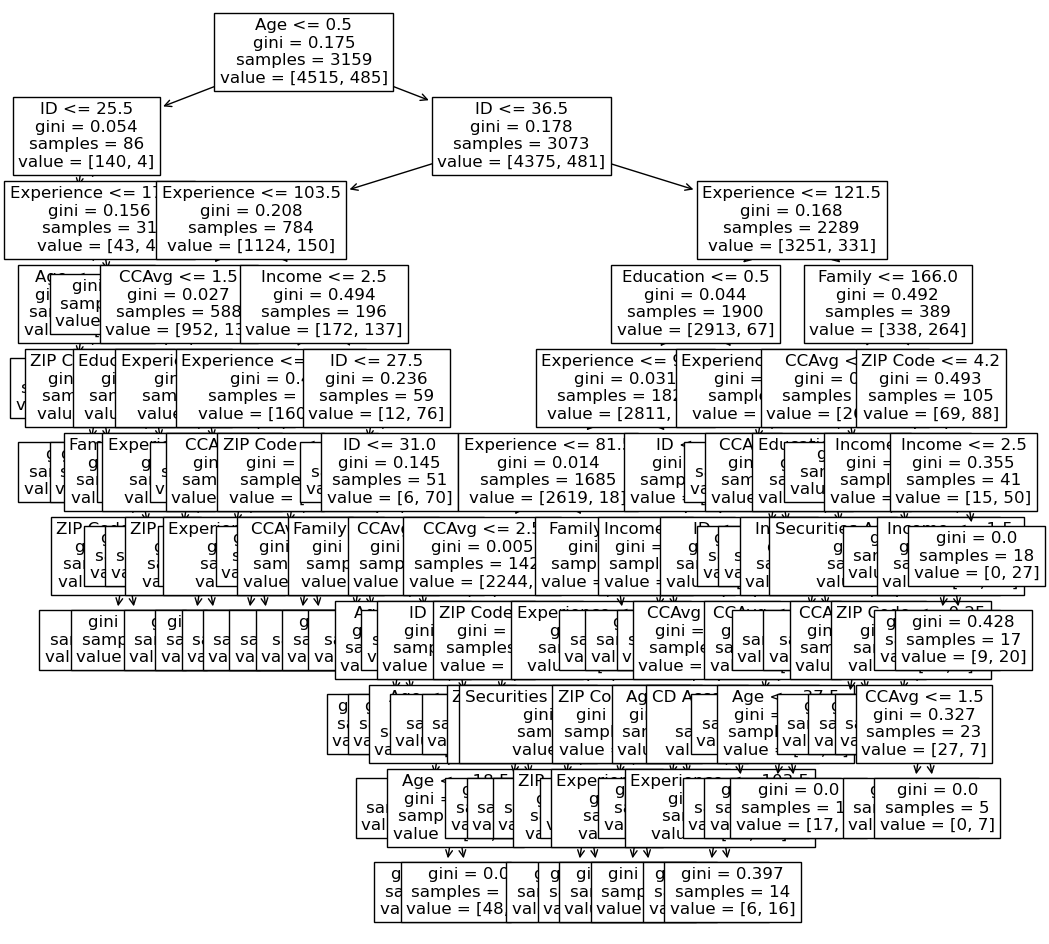

In [14]:
feature_names=bank_df.columns.tolist()
plt.figure(figsize=(12,12))
plot_tree(RF.estimators_[0],fontsize=12,feature_names=feature_names)
plt.show()

               feature  importance
2               Income    0.359096
6            Education    0.224838
4                CCAvg    0.165430
3               Family    0.118017
8           CD Account    0.059643
5             Mortgage    0.027432
0                  Age    0.018796
1           Experience    0.016987
10          CreditCard    0.004831
9               Online    0.002519
7   Securities Account    0.002410


Text(0, 0.5, '')

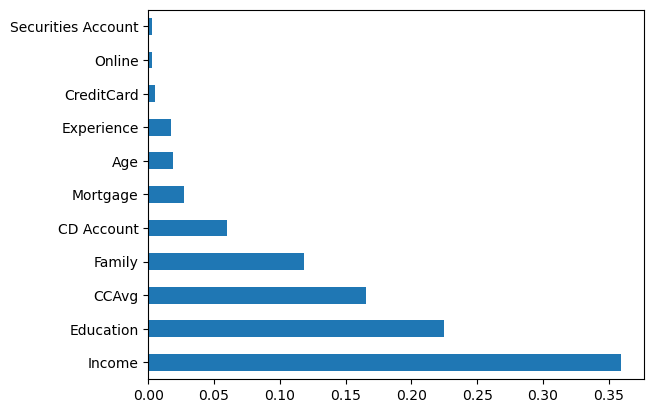

In [54]:
importances = RF.feature_importances_
# std = np.std([RF.feature_importances_ for tree in RF.estimators_], axis=0)
idf = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# idf = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
idf = idf.sort_values('importance',ascending=False)
print(idf)
ax = idf.plot(kind='barh', x='feature', legend=False)
ax.set_ylabel('')